In [37]:
ex = """6,10
0,14
9,10
0,3
10,4
4,11
6,0
6,12
4,1
0,13
10,12
3,4
3,0
8,4
1,10
2,14
8,10
9,0

fold along y=7
fold along x=5"""

from collections import namedtuple, defaultdict
from parse import parse

def read(inp):
    inp = inp.strip()
    points, folds = inp.split('\n\n')
    folds = [parse("fold along {}={:n}", l).fixed for l in folds.split('\n')]
    
    res = defaultdict(bool)
    for p in points.split("\n"):
        x,y = p.split(',' )
        res[(int(x), int(y))] = True
    return res, folds

points, folds = read(ex)
folds

[('y', 7), ('x', 5)]

10 14


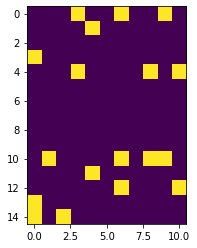

In [39]:
from matplotlib import pyplot as plt
import numpy as np
def show(grid):
    x_max = max([p[0] for p in grid])
    y_max = max([p[1] for p in grid])
    g = np.zeros((y_max+1, x_max+1))
    for p in grid:
        g[p[1], p[0]] = int(grid[p])
    plt.imshow(g)
show(points)


10 4


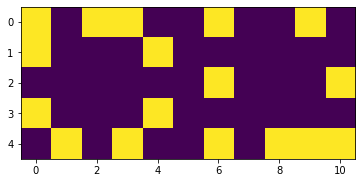

In [46]:
def fold(grid, f):
    new_grid = defaultdict(bool)
    axis, line = f
    axis = 0 if axis=='x' else 1
    #print(axis, line)
    for p in grid:
        if p[axis] < line:
            new_grid[p] = True
            continue
        d = p[axis] - line
        new_x, new_y = p
        #print(axis, line, d)
        if axis == 0:
            new_x = line - d
        else:
            new_y = line-d
        new_grid[(new_x, new_y)] = True
    return new_grid
        


show(fold(points, folds[0]))


In [47]:
def part1(inp):
    points, folds = read(inp)
    res = fold(points, folds[0])
    return len(res)


part1(ex)

17

In [48]:
pzl = open("data/13.txt").read()
part1(pzl)

795

4 4


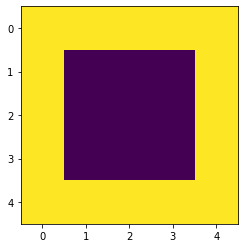

In [49]:
def part2(inp):
    points, folds = read(inp)
    for f in folds:
        points = fold(points, f)
    show(points)

part2(ex)

38 5


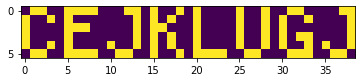

In [50]:
part2(pzl)